In [1]:
import pynbody
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

In [2]:
snap = "/home/michele/sim/MySimulations/Moria8Gyr_tidal/sim69002_p200.0_a600.0_r600.0_c8.15_z0/out/snapshot_0095"
# snap = "/home/michele/sim/MoRIA/sim69002/snapshot_0006"

In [3]:
s = pynbody.load(snap)

In [4]:
# pynbody.analysis.halo.center(s.g)
# pynbody.analysis.angmom.faceon(s)

In [5]:
s.g['smooth']/=2

In [6]:
v_com = pynbody.analysis.halo.center_of_mass_velocity(s)
v_com

SimArray([159.79895  , 144.71556  ,  -4.4977536], dtype=float32, 'km s**-1')

In [7]:
s['vel'].mean(axis=0)

SimArray([107.38968   , 118.095894  ,  -0.28801644], dtype=float32, 'km s**-1')

In [8]:
s['vel'] = s['vel']-v_com

In [9]:
s['vel'].mean(axis=0)

SimArray([-52.41188  , -26.61697  ,   4.2097416], dtype=float32, 'km s**-1')

In [10]:
resolution = 1000
width = 10

In [11]:
pynbody.analysis.halo.center(s.g)

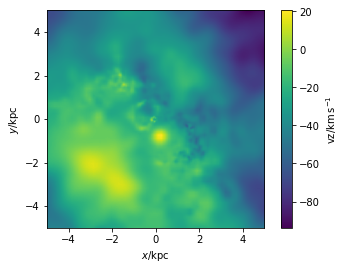

In [12]:
kinematicmap = pynbody.plot.image(s.gas, qty='vz', width=width, log=False, units='km s^-1', resolution=resolution)

In [13]:
# sigma = 2
# convolved_map = gaussian_filter(kinematicmap, sigma)

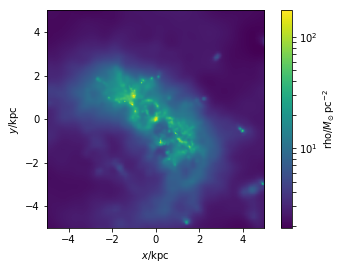

In [14]:
surfacedensity = pynbody.plot.image(s.g, width=10, resolution=resolution, units = 'Msol pc^-2')

In [15]:
# surf_dens_limit = 0.8 # "0.8 Msol/pc^2"
surf_dens_limit = 3 # "0.8 Msol/pc^2"

Set to 0 the line of sight velocities when the surface density is below a certain level

In [16]:
surfacedensity.min()

SimArray(1.9211819, dtype=float32, 'Msol pc**-2')

In [17]:
bool_filter = surfacedensity < surf_dens_limit

In [18]:
surfacedensity[bool_filter] = 0
surfacedensity

SimArray([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]], dtype=float32, 'Msol pc**-2')

/home/michele/Software/miniconda3/envs/pynbody/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


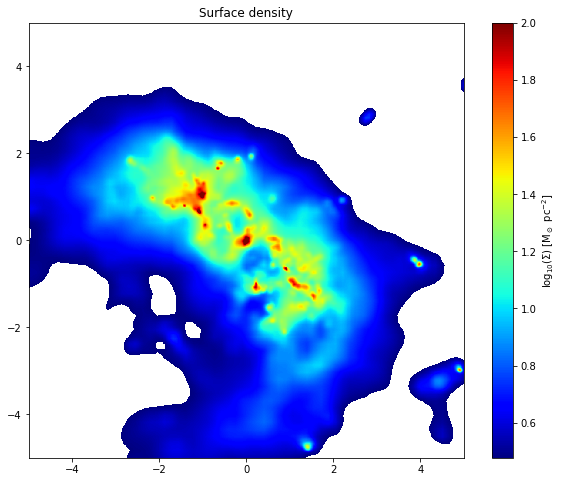

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
CS = ax.imshow(np.log10(surfacedensity), cmap='jet', aspect='equal',
               extent=(-width/2, width/2, -width/2, width/2), vmin=np.log10(surf_dens_limit), vmax=2, origin='lower')
cbar = fig.colorbar(CS, label='$\log_{10}(\Sigma)\ \mathrm{[M_\odot\ pc^{-2}]}$')
ax.set_title("Surface density");

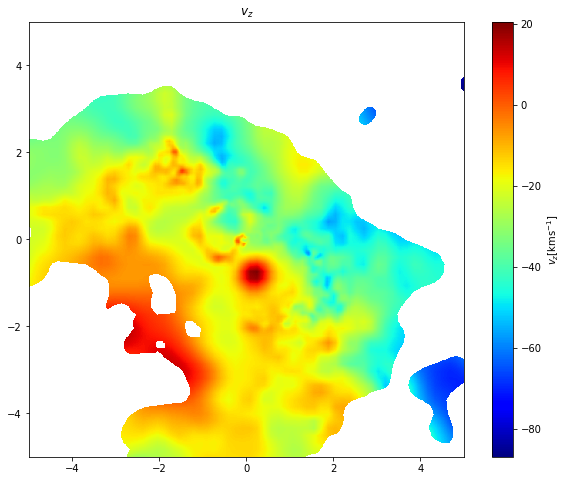

In [20]:
fig, ax = plt.subplots(1, figsize=(10,8))
kinematicmap[bool_filter] = np.NaN
km = ax.imshow(kinematicmap, cmap='jet', aspect='equal', extent=(-width/2, width/2, -width/2, width/2), origin='lower')
cbar = fig.colorbar(km, label='$v_z \mathrm{[km s^{-1}]}$')
ax.set_title("$v_z$");